In [96]:
# from train_autoencoder import *
import numpy as np
import matplotlib.pyplot as plt
from mpcontribs.client import Client

from mp_api.client import MPRester
import numpy as np
import matplotlib.pyplot as plt
import csv

from tqdm import tqdm

In [4]:
apikey = 'SFTntPIf0QnTef7f6sZKkBSwGILrxlXZ'
client = Client(apikey=apikey, project="2dmatpedia")


In [11]:
# query = {"formula__contains": "Fe"}
fields = ["identifier", "formula"]
limit = 10
D2matdata = client.query_contributions(
    query=[], fields=fields, paginate=True
)

Totals: 100%|##########| 50/50 [00:05<00:00,  9.78it/s]


{'total_count': 6349,
 'data': [{'identifier': 'mp-972889', 'formula': 'ScSn3'},
  {'identifier': 'mp-570356', 'formula': 'Ca5Ir'},
  {'identifier': 'mp-570356', 'formula': 'Ca5Ir'},
  {'identifier': 'mp-525', 'formula': 'NbSe3'},
  {'identifier': 'mp-1443', 'formula': 'Sn3F8'},
  {'identifier': 'mp-567471', 'formula': 'HgI2'},
  {'identifier': 'mp-27975', 'formula': 'NdBr3'},
  {'identifier': 'mp-484', 'formula': 'Te3As2'},
  {'identifier': 'mp-11675', 'formula': 'NbTe2'},
  {'identifier': 'mp-27734', 'formula': 'CrBr3'},
  {'identifier': 'mp-542634', 'formula': 'Ta2Te3'},
  {'identifier': 'mp-28233', 'formula': 'MnCl2'},
  {'identifier': 'mp-1880', 'formula': 'SbF3'},
  {'identifier': 'mp-29803', 'formula': 'SiH'},
  {'identifier': 'mp-570922', 'formula': 'MgCl2'},
  {'identifier': 'mp-665', 'formula': 'SnSe2'},
  {'identifier': 'mp-12693', 'formula': 'Mg2Rh'},
  {'identifier': 'mp-2632', 'formula': 'TlF3'},
  {'identifier': 'mp-29671', 'formula': 'TmI2'},
  {'identifier': 'mp-2809',

In [49]:
material_ids = []   
with open('table_export.csv','r') as read_file:
    data_reader = csv.reader(read_file)
    material_ids = [] 
    for row in data_reader:
        material_ids.append(row[2])

    material_ids.pop(0)



In [51]:
material_ids[:10]

['mp-9583',
 'mp-22988',
 'mp-22867',
 'mp-3924',
 'mp-22935',
 'mp-13313',
 'mp-23406',
 'mp-9564',
 'mp-30530',
 'mp-856']

In [55]:
bbs = 0
with MPRester(api_key="SFTntPIf0QnTef7f6sZKkBSwGILrxlXZ") as mpr:

    bbs = mpr.get_bandstructure_by_material_id(material_ids[:10], line_mode=False)

Retrieving ElectronicStructureDoc documents: 100%|██████████| 10/10 [00:00<00:00, 245280.94it/s]


In [ ]:
with MPRester(api_key="SFTntPIf0QnTef7f6sZKkBSwGILrxlXZ") as mpr:

    mpr.

In [56]:
bbs

In [23]:
material_ids = ['mp-2809', 'mp-570356'] 

In [43]:
D2matdata['data'][0]

{'identifier': 'mp-972889', 'formula': 'ScSn3'}

In [47]:
for id, material in D2matdata['data']:
    print(id['data'])

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[47], line 2
      1 for id, material in D2matdata['data']:
----> 2     print(id['data'])

TypeError: string indices must be integers, not 'str'


In [135]:
band_structs = []
with MPRester(api_key="SFTntPIf0QnTef7f6sZKkBSwGILrxlXZ") as mpr:
    for item in tqdm(D2matdata['data'][:10]):
        mat_id = item['identifier']
        material = item['formula']

        try:
            bandstructure = mpr.get_bandstructure_by_material_id(mat_id, line_mode=False)
            kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
            dim1 = np.unique(kpt[:,0])
            dim2 = np.unique(kpt[:,1])
            dim3 = np.unique(kpt[:,2])
            
            band_structs.append(
                [(len(dim1), len(dim2)), len(dim3), kpt, bandstructure]
            )
            print(material, id)

        except Exception as e:
            print(f"Error retrieving band structure for {mat_id}: {e}")
    


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:02<00:21,  2.36s/it]

ScSn3 mp-570356


 20%|██        | 2/10 [00:07<00:30,  3.79s/it]

Ca5Ir mp-570356


 30%|███       | 3/10 [00:10<00:24,  3.51s/it]

Ca5Ir mp-570356


 40%|████      | 4/10 [00:16<00:26,  4.49s/it]

NbSe3 mp-570356


 50%|█████     | 5/10 [00:17<00:15,  3.15s/it]

Sn3F8 mp-570356


 60%|██████    | 6/10 [00:17<00:09,  2.32s/it]

HgI2 mp-570356


 70%|███████   | 7/10 [00:18<00:05,  1.91s/it]

NdBr3 mp-570356


 80%|████████  | 8/10 [00:19<00:03,  1.58s/it]

Te3As2 mp-570356


 90%|█████████ | 9/10 [00:20<00:01,  1.36s/it]

NbTe2 mp-570356


100%|██████████| 10/10 [00:22<00:00,  2.27s/it]

CrBr3 mp-570356


In [122]:
band_structs[1]

[(6, 6),
 4,

In [107]:
sorted(band_structs, key=lambda x: x[0])

[[(3, 8),
  4,
 [(4, 3),
  3,
 [(4, 4),
  2,
 [(4, 4),
  2,
 [(4, 4),
  2,
 [(4, 4),
  1,
 [(4, 9),
  5,
 [(5, 3),
  5,
 [(5, 3),
  5,
 [(5, 3),
  5,
 [(5, 3),
  9,
 [(5, 3),
  6,
 [(5, 4),
  4,
 [(5, 4),
  3,
 [(5, 5),
  9,
 [(5, 8),
  5,
 [(5, 9),
  5,
 [(5, 9),
  5,
 [(6, 2),
  2,
 [(6, 4),
  5,
 [(6, 5),
  4,
 [(6, 6),
  4,
 [(6, 6),
  4,
 [(6, 6),
  4,
 [(6, 6),
  5,
 [(6, 6),
  4,
 [(6, 6),
  5,
 [(6, 6),
  3,
 [(6, 6),
  3,
 [(6, 7),
  6,
 [(6, 8),
  5,
 [(6, 8),
  3,
 [(6, 9),
  5,
 [(6, 10),
  4,
 [(6, 11),
  3,
 [(6, 11),
  4,
 [(7, 4),
  2,
 [(7, 5),
  4,
 [(7, 5),
  5,
 [(7, 6),
  5,
 [(7, 6),
  6,
 [(7, 6),
  4,
 [(7, 6),
  6,
 [(7, 6),
  6,
 [(7, 6),
  5,
 [(7, 6),
  6,
 [(7, 7),
  5,
 [(7, 7),
  5,
 [(7, 7),
  5,
 [(7, 7),
  5,
 [(7, 7),
  5,
 [(7, 7),
  5,
 [(7, 11),
  4,
 [(7, 11),
  3,
 [(7, 12),
  6,
 [(7, 12),
  6,
 [(8, 4),
  4,
 [(8, 5),
  4,
 [(8, 5),
  4,
 [(8, 5),
  6,
 [(8, 5),
  4,
 [(8, 5),
  4,
 [(8, 6),
  3,
 [(8, 6),
  5,
 [(8, 6),
  5,
 [(8, 6),
  1,
 [(

In [131]:
symmband_structs = [x for x in band_structs if x[0][0] == x[0][1]]


In [123]:
kpt = np.array([kpt.frac_coords for kpt in band_structs[1][2].kpoints ])
dim1 = np.unique(kpt[:,0])
dim2 = np.unique(kpt[:,1])
dim3 = np.unique(kpt[:,2])
print(len(dim1), dim1 )
print(len(dim2), dim2 )
print(len(dim3), dim3 )

6 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545]
6 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545]
4 [0.         0.16666667 0.33333333 0.5       ]


In [125]:
bands_tmp = np.array(list(band_structs[1][2].bands.values()))[0][:, :36]
print(bands_tmp.shape)

bands_refined = np.array([band for band in bands_tmp if np.max(band)- np.min(band) > 0.5])
print(bands_refined.shape)

(178, 36)
(14, 36)


In [ ]:

def refine_BS(kpts,  BS):
    kx10 = np.linspace(0, 0.5, 10)
    ky10 = np.linspace(0, 0.5, 10)
    kX10, kY10 = np.meshgrid(kx10, ky10, indexing='ij')

    ndim = int(BS.shape[0]**0.5)
    kx = np.linspace(0, 0.5, ndim)
    ky = np.linspace(0, 0.5, ndim)


    interp = RegularGridInterpolator((kx, ky), BS,
                                    bounds_error=False, fill_value=None)

BS = interp((X, Y))

In [126]:
print(bands_refined)

[[-2.0758 -2.0459 -1.9572 -1.813  -1.6194 -1.3884 -2.0515 -2.0219 -1.9338
  -1.7909 -1.5992 -1.3713 -1.9793 -1.9503 -1.8644 -1.7252 -1.5398 -1.3215
  -1.8609 -1.833  -1.7508 -1.6185 -1.4442 -1.2437 -1.6993 -1.6732 -1.5967
  -1.4749 -1.3184 -1.1466 -1.499  -1.4756 -1.4073 -1.3013 -1.172  -1.0445]
 [-1.769  -1.7415 -1.6604 -1.5297 -1.3589 -1.2051 -1.7464 -1.7192 -1.6389
  -1.5099 -1.3418 -1.1912 -1.6792 -1.6529 -1.5754 -1.4515 -1.2918 -1.1516
  -1.5694 -1.5447 -1.4721 -1.3575 -1.2133 -1.0923 -1.4207 -1.3983 -1.3334
  -1.2336 -1.1147 -1.0251 -1.267  -1.2472 -1.1909 -1.1083 -1.0197 -0.9674]
 [-0.6688 -0.6416 -0.5612 -0.5638 -0.817  -1.0376 -0.6476 -0.6206 -0.5405
  -0.5745 -0.8142 -1.0277 -0.5847 -0.558  -0.5358 -0.612  -0.8098 -1.0007
  -0.753  -0.7462 -0.7325 -0.7331 -0.816  -0.9657 -1.0131 -0.9986 -0.9598
  -0.9116 -0.8818 -0.9381 -1.2382 -1.2194 -1.166  -1.0888 -1.0088 -0.9558]
 [-0.2605 -0.2813 -0.3604 -0.486  -0.6757 -0.8931 -0.3305 -0.3457 -0.4015
  -0.5124 -0.6838 -0.8888 -0.5119 -

In [108]:
[x[0] for x in sorted(band_structs, key=lambda x: x[0])]

[(3, 8),
 (4, 3),
 (4, 4),
 (4, 4),
 (4, 4),
 (4, 4),
 (4, 9),
 (5, 3),
 (5, 3),
 (5, 3),
 (5, 3),
 (5, 3),
 (5, 4),
 (5, 4),
 (5, 5),
 (5, 8),
 (5, 9),
 (5, 9),
 (6, 2),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 11),
 (7, 4),
 (7, 5),
 (7, 5),
 (7, 6),
 (7, 6),
 (7, 6),
 (7, 6),
 (7, 6),
 (7, 6),
 (7, 6),
 (7, 7),
 (7, 7),
 (7, 7),
 (7, 7),
 (7, 7),
 (7, 7),
 (7, 11),
 (7, 11),
 (7, 12),
 (7, 12),
 (8, 4),
 (8, 5),
 (8, 5),
 (8, 5),
 (8, 5),
 (8, 5),
 (8, 6),
 (8, 6),
 (8, 6),
 (8, 6),
 (8, 6),
 (8, 7),
 (8, 7),
 (8, 7),
 (8, 7),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 8),
 (8, 11),
 (8, 11),
 (9, 4),
 (9, 5),
 (9, 5),
 (9, 6),
 (9, 6),
 (9, 7),
 (9, 7),
 (9, 8),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 9),
 (9, 11),
 (10, 4),
 (10, 4),
 (10, 5),
 (10, 5),
 (10,

In [72]:
np.array(list(bandstructure.bands.values()))[0]

array([[-39.1267, -39.1266, -39.1264, ..., -39.1247, -39.1244, -39.1241],
       [-39.1265, -39.1265, -39.1263, ..., -39.1247, -39.1244, -39.1241],
       [-39.1229, -39.123 , -39.1232, ..., -39.1242, -39.124 , -39.124 ],
       ...,
       [  6.0996,   6.1153,   6.1482, ...,   6.2195,   6.2006,   6.2735],
       [  6.2848,   6.2762,   6.242 , ...,   6.2894,   6.3478,   6.3841],
       [  6.3517,   6.3671,   6.4188, ...,   6.3632,   6.4137,   6.4459]])

In [38]:
kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
dim1 = np.unique(kpt[:,0])
dim2 = np.unique(kpt[:,1])
dim3 = np.unique(kpt[:,2])
print(len(dim1), dim1 )
print(len(dim2), dim2 )
print(len(dim3), dim3 )

9 [0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5   ]
4 [0.         0.16666667 0.33333333 0.5       ]
3 [0.  0.2 0.4]


In [89]:
from mpl_toolkits.mplot3d import Axes3D


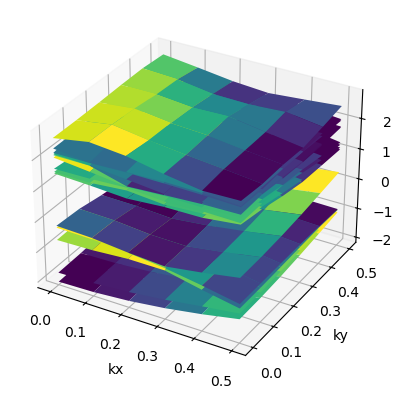

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(14):
    # band = list(bandstructure.bands.values())[0][i][:36]
    band =bands_refined[i]
    bb = np.reshape(band, (6, 6))
# Plot the surface
    ax.plot_surface(kx, ky, bb, cmap='viridis')

# Add labels
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
# ax.set_zlim((-4, 2))
# Show the plot
plt.show()

In [83]:
band = list(bandstructure.bands.values())[0][80][:36]

In [85]:
kx = np.linspace(0, 0.5, 6)
ky = np.linspace(0, 0.5, 6)
kx, ky = np.meshgrid(kx, ky)
kpoints = np.array([kx.flatten(), ky.flatten()]).T

bb = np.reshape(band, (6, 6))

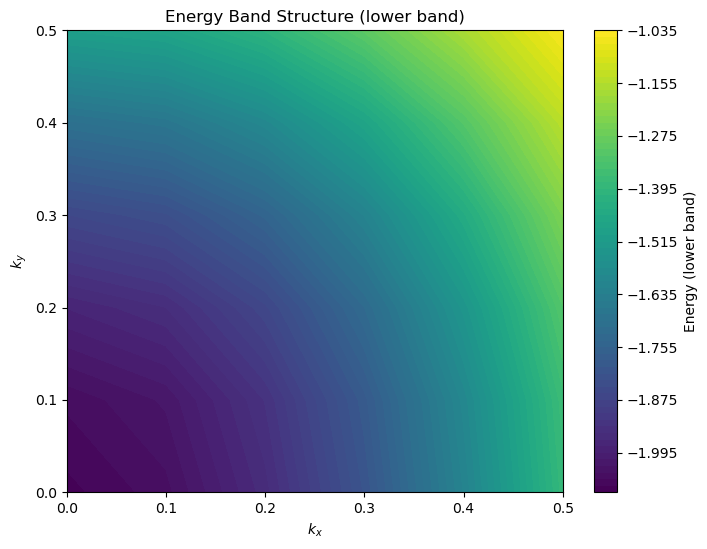

In [88]:
plt.figure(figsize=(8, 6))
plt.contourf(kx, ky, bb, levels=100, cmap='viridis')
plt.colorbar(label='Energy (lower band)')
plt.title('Energy Band Structure (lower band)')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [87]:
bb = np.reshape(band, (6, 6))
bb

array([[-2.0758, -2.0459, -1.9572, -1.813 , -1.6194, -1.3884],
       [-2.0515, -2.0219, -1.9338, -1.7909, -1.5992, -1.3713],
       [-1.9793, -1.9503, -1.8644, -1.7252, -1.5398, -1.3215],
       [-1.8609, -1.833 , -1.7508, -1.6185, -1.4442, -1.2437],
       [-1.6993, -1.6732, -1.5967, -1.4749, -1.3184, -1.1466],
       [-1.499 , -1.4756, -1.4073, -1.3013, -1.172 , -1.0445]])

In [20]:
import plotly.graph_objects as go
import numpy as np


In [25]:
def plot_conf(conf):
    Sx = conf[:,0].flatten()
    Sy = conf[:,1].flatten()
    Sz = conf[:,2].flatten()

    fig = go.Figure()
    # fig.update_xaxes(range=[-1, 1])
    # fig.update_yaxes(range=[-1, 1])
    # fig.update_zaxes(range=[-1, 1])
    fig.add_trace(
        go.Scatter3d(x=Sx, y=Sy, z=Sz,
                    mode='markers',
                    #  size=np.ones(len(SSS))*1
                    marker=dict(
                                size=3.0,
                                # color=z,                # set color to an array/list of desired values
                                # colorscale='Viridis',   # choose a colorscale
                                opacity=0.7
                            )
                    )
        )
    fig.update_layout(scene = dict(
                        xaxis = dict(nticks=4, range=[-1,1],),
                        yaxis = dict(nticks=4, range=[-1,1],),
                        zaxis = dict(nticks=4, range=[-1,1],),),
                    width=700,
                    legend_orientation="h",
                    legend=dict(x=.5, xanchor="center"),
                    hovermode="x",
                    margin=dict(l=0, r=0, t=0, b=0))


    fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
    fig.show()

kkp = np.array([kpt.frac_coords for kpt in bandstructure.kpoints])
plot_conf(kkp)

In [22]:
kkp

array([[0.        , 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.18181818, 0.        , 0.        ],
       [0.27272727, 0.        , 0.        ],
       [0.36363636, 0.        , 0.        ],
       [0.45454545, 0.        , 0.        ],
       [0.        , 0.09090909, 0.        ],
       [0.09090909, 0.09090909, 0.        ],
       [0.18181818, 0.09090909, 0.        ],
       [0.27272727, 0.09090909, 0.        ],
       [0.36363636, 0.09090909, 0.        ],
       [0.45454545, 0.09090909, 0.        ],
       [0.        , 0.18181818, 0.        ],
       [0.09090909, 0.18181818, 0.        ],
       [0.18181818, 0.18181818, 0.        ],
       [0.27272727, 0.18181818, 0.        ],
       [0.36363636, 0.18181818, 0.        ],
       [0.45454545, 0.18181818, 0.        ],
       [0.        , 0.27272727, 0.        ],
       [0.09090909, 0.27272727, 0.        ],
       [0.18181818, 0.27272727, 0.        ],
       [0.27272727, 0.27272727, 0.        ],
       [0.

In [44]:
kline = [ [ind ,kpt.frac_coords] for ind, kpt in enumerate(bandstructure.kpoints) if kpt.frac_coords[1] == 0 and kpt.frac_coords[2] == 0.125 ]
kline

[[64, array([0.   , 0.   , 0.125])],
 [65, array([0.06666667, 0.        , 0.125     ])],
 [66, array([0.13333333, 0.        , 0.125     ])],
 [67, array([0.2  , 0.   , 0.125])],
 [68, array([0.26666667, 0.        , 0.125     ])],
 [69, array([0.33333333, 0.        , 0.125     ])],
 [70, array([0.4  , 0.   , 0.125])],
 [71, array([0.46666667, 0.        , 0.125     ])],
 [72, array([-0.46666667,  0.        ,  0.125     ])],
 [73, array([-0.4  ,  0.   ,  0.125])],
 [74, array([-0.33333333,  0.        ,  0.125     ])],
 [75, array([-0.26666667,  0.        ,  0.125     ])],
 [76, array([-0.2  ,  0.   ,  0.125])],
 [77, array([-0.13333333,  0.        ,  0.125     ])],
 [78, array([-0.06666667,  0.        ,  0.125     ])]]

In [45]:
inds  = [kk[0] for kk in kline] 
kpts  = [kk[1] for kk in kline] 
kpts = np.array(kpts)[:, 0]
kpts

array([ 0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667, -0.46666667, -0.4       ,
       -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667])

In [25]:
np.array(kline)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (8, 2) + inhomogeneous part.

In [29]:
list(bandstructure.bands.values())[0][15][inds]

array([-5.0251, -5.0659, -5.157 , -5.2596, -5.3258, -5.3164, -5.3057,
       -5.2977])

In [56]:
# band = list(bandstructure.bands.values())[0][15] - bandstructure.efermi
band = list(bandstructure.bands.values())[0][29][inds]
band

array([2.6742, 2.7984, 3.065 , 3.45  , 3.9229, 4.4433, 4.9452, 5.264 ,
       5.1279, 4.6822, 4.1587, 3.6527, 3.2175, 2.8921, 2.7056])

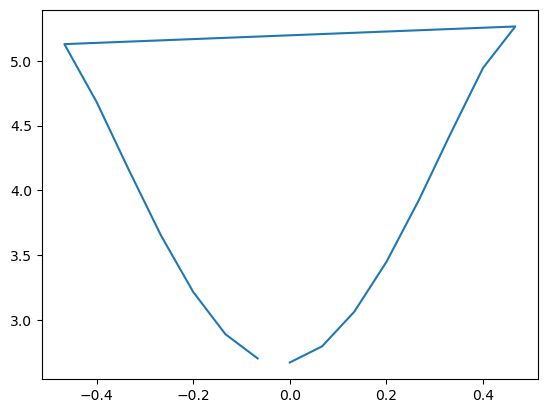

In [57]:
# random_band = generate(model)
# ks = list(np.linspace(-torch.pi, torch.pi, 1000 ))
# p_eval = np.polyval(poly_band.T, ks)
plt.plot(kpts, band)
# plt.ylim((-500, 200))
plt.show()

In [11]:
kkp

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.1010767 ,  0.        ,  0.0316198 ],
       [ 0.20215339,  0.        ,  0.06323959],
       ...,
       [-0.60646019,  0.60646019,  0.47429695],
       [ 0.70753689,  0.70753689,  0.91697411],
       [-0.70753689,  0.70753689,  0.47429695]])

In [13]:
bandstructure.kpoints

<bound method BandStructure.get_sym_eq_kpoints of <pymatgen.electronic_structure.bandstructure.BandStructureSymmLine object at 0x7374912a8c80>>

In [ ]:
for element in bandstructure.bands:
    for i in range(bandstructure.nb_bands):
        band = list(bandstructure.bands.values())[0][i] - bandstructure.efermi
        krange = np.linspace(-np.pi, np.pi, len(band))
        poly_coeffs = np.polyfit(krange, band, 20)
        print(band)
    break